<a href="https://colab.research.google.com/github/f-ssemwanga/MachineLearning_DeepLearning/blob/main/001_Tensorflowfundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fundamental concepts of tensors in tensorflow
- introduction to tensors
- getting information from tensors
- changing info in tensors
- tensors and NUMpy
- using @tf.functions  (speeds up regular python functions)
- using GPUs and TensorFlow ( or TPUs)
- Exercises

#Introduction to tensors using tf.constant

In [ ]:
#import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
#Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#check number of dimension (ndim stands for number of dimensions)
scalar.ndim  # returns 0 because the shape attribute is shape()

0

In [ ]:
#create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#check dimension of the vector
vector.ndim # look at the tuple in the shape of the vector above - it has one item

1

In [ ]:
#create a matric ( has more than one dimension)
matrix = tf.constant([
    [10,7],
    [7,10]
])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
#create another matrix
another_matrix =tf.constant([
    [10.,7.],
    [3.,2.],
    [8.,9,]],dtype=tf.float16) 
'''
 specify the float data type - the higher the numer in dtype the lower the precision but less
 data is stored, the higher the number e.g. float32 the higher the precision but the larger 
 the data'''
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
#What is the number of dimensions of another_matrix?
another_matrix.ndim

2

In [ ]:
#Increasing a number of dimensions
'''
Scaler = 1 dimension
Matrix = 2 dimensions
Tensor  = multi dimension ???
'''
#Creating a Tensor
tensor = tf.constant([[[1,2,3],
                        [4,5,6]],
                      [[7,8,9],
                        [10,11,12]],
                    [[13,14,15],
                      [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
#What is the dimensions of a tensor?
tensor.ndim
#

3

#Summary Definitions
* Scalar: a single number
* Vector: a number with direction e.g. (wind speed and direction
* Matrix a 2D array of numbers
* Tensor is an n-dimesional array of numbers

#Creating Tensors using `tf.variable`

In [ ]:
#create same tensors using tf variable
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])

changeable_tensor , unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#changing one of the elements in the changeable tensor
changeable_tensor[0] = 7

TypeError: ignored

In [ ]:
#using .assign()
changeable_tensor[0].assign(7)
changeable_tensor

⚡Rarely in practice one needs to decide whether to use tf.constant or tf.Variable to create tensors as TensorFlow does this automatically.
# Creating Random Tensors

Random tensors are tensors

##usage: 
When a neuro network intialises / starts to learn, it uses random weights / random tensors / random patterns on which it has been trained' it then learns from these to update / train the output to match the learning output

In [ ]:
#create two random (but same) tensors
random_1 = tf.random.Generator.from_seed(42) #set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_1

random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

#check if the two tensors are equal
random_1, random_2, random_1 ==random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

#Shuffle the order of elements in a tensor

### usage:
If the Tensors are not shuffled, the neuro network might adjust its learning to only the values its encountering which might be too aligned however, shuffling introduces randomness such that the inherent order doesn't affect learning

In [ ]:
#shuffle a tensor
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
not_shuffled.ndim
#shuffle a non random tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [ ]:
not_shuffled

NameError: ignored

⏰**Exercise** Read through TensorFlow documentation on random seed generation:

[Random Seed](https://www.tensorflow.org/api_docs/python/tf/random/set_seed) and practice writing 5 random tensors and shuffle them.

In [ ]:
#Operation level seed
#we get a different order each time
tf.random.shuffle(not_shuffled, seed=42)

In [ ]:
#global level random level seed
tf.random.set_seed(42)

###Conclusion

If we want the shuffled tensors to be in the same order, we have to use the global level random seed and the operational level random seed.

####Rule 4 
> Rule 4: If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

NameError: ignored

##Recommended use of shuffling to make reproducable experiments

* Shuffle input data in a similar order
* Initialise with a similar random patterm


###Other ways of making tensors

In [ ]:
tf.ones([10,7], tf.int32) # creates a tensor of all ones passing a shape and data type

<tf.Tensor: shape=(10, 7), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]], dtype=int32)>

In [ ]:
tf.zeros((3,4),tf.float16) # creates a tensor array of floats with zeros

#Convert a numpy array into tensors
The main difference between Numpy array and tensor arrays is that tensors can be run on a GPU faster for numerical computing i.e. finding patterns in numbers

In [ ]:
#turn numpy array into tensors
import numpy as np
#X = tf.constant(Some_matrix) # capital for a matrix or tensor
#y = tf.constant(vector) # non capital for a vector
numpy_A= np.arange(1,25, dtype=np.int32) # create a numpy array between 1 and 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
#convert a numpy array into a tensor
#tf.convert_to_tensor(numpy_A, dtype=tf.int32)
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
#Convert a numpy array into a 2D tensor
B = tf.constant(numpy_A,shape=(6,4))
B

<tf.Tensor: shape=(6, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]], dtype=int32)>

In [ ]:
#convert a numpy array into a 3D tensor

C = tf.constant(numpy_A,shape=(2,3,4))
C

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

#Getting more information from Tensors
When dealing with tensors you probably want to be aware of the following attribues:
* Shape
* Rank
* Axis or dimension
* Size



In [20]:
#Create a rank 4 tensor i.e. a tensor with 4 dimensions
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [21]:
rank_4_tensor[0] # return the first element in rank_4_Tensor

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

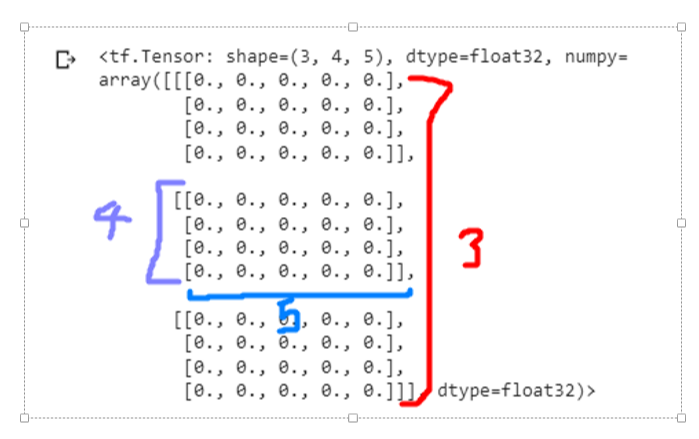

In [22]:
#getting other attributes
rank_4_tensor.shape,rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [23]:
#number of elements in product of dimentions
2*3*4*5

120

In [28]:
#Get various attributes of a tensor using print statements

print(f'Data type of every element: {rank_4_tensor.dtype}')
print(f'Number of dimensions: {rank_4_tensor.ndim}')
print(f'The shape of the tensor: {rank_4_tensor.shape} ')
print(f'Elements alog the 0 axis:{rank_4_tensor.shape[0]} ')
print(f'Elements along the last axis: {rank_4_tensor.shape[-1]}')
print(f'The total number of elements in a tensor: {tf.size(rank_4_tensor)}')

Data type of every element: <dtype: 'float32'>
Number of dimensions: 4
The shape of the tensor: (2, 3, 4, 5) 
Elements alog the 0 axis:2 
Elements along the last axis: 5
The total number of elements in a tensor: 120
